### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write-up, download this file as a PDF or HTML file, upload that PDF/HTML into the workspace here (click on the orange Jupyter icon in the upper left then Upload), then use the Submit Project button at the bottom of this page. This will create a zip file containing both this .ipynb doc and the PDF/HTML doc that will be submitted for your project.


(1) What is the independent variable? What is the dependent variable?

Independent variable: the congruency of the word 
<br>
Dependent variable: the response time 

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

$$H_{0}: T_{congruent} = T_{incongruent}$$
<br>
$$H_{a}: T_{congruent} < T_{incongruent}$$

The null hypothesis states the response time for both congruent and ingcongruent word is the same. The alternative hypothesis states the response time for congruent word is less than the response time for incongruent word.

We will perform sample t-test and assume the distributions to be normal.

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [1]:
# Perform the analysis here
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import math
%matplotlib inline

# Setting the seed to assure result is replicable
random.seed(42)

In [2]:
# Read in the data set and take a look at the top rows
df = pd.read_csv('stroopdata.csv')
df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [3]:
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


The mean and std response times for Congruent words are 14.05 sec and 3.56 sec, respectively.
<br>
The mean and std response times for Incongruent words are 22.02 sec and 4.80 sec, respectively.
<be>
The mean and std response times  for Congruent words are less than the Incongruens'.

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

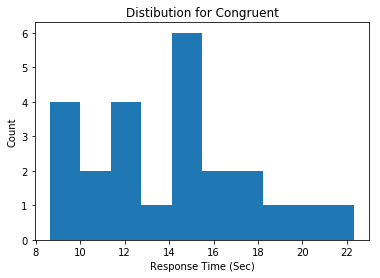

In [4]:
# Build the visualizations for Congruent words
plt.hist(df['Congruent']);
plt.title("Distibution for Congruent");
plt.xlabel("Response Time (Sec)");
plt.ylabel("Count");

The distribution for Congruent word response is slightly skewed to the right. The 14 - 16 response time has the highest count.

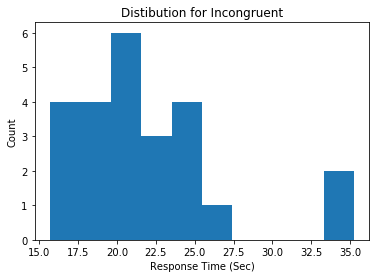

In [5]:
# Build the visualizations for Incongruent words
plt.hist(df['Incongruent']);
plt.title("Distibution for Incongruent");
plt.xlabel("Response Time (Sec)");
plt.ylabel("Count");

The distribution for Incongruent word response is also skewed to the right. The distribution has few outliers on the right end of graph.

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

Ans: We should perform a Paired t-test because each participant's response times were recorded both on the congruent or incongruent words on different occasions. We will give one sided 95% confidence level so the Type I error will be 5%.





In [13]:
# Perform the statistical test here
# Based on this article http://www2.psychology.uiowa.edu/faculty/mordkoff/GradStats/part%201/I.07%20normal.pdf
# The sample size greater than 30 to assume normality
n = 30

df_sample = df.sample(n, replace=True, random_state=42)
diff = df_sample["Incongruent"] - df_sample["Congruent"]
sample_mean = diff.mean()
sample_std = diff.std()
SE = sample_std/math.sqrt(n)

T = sample_mean/SE

print(T)

8.220568588888064


The Critical value  for df = 29 and alpha = 0.05 is 1.699127 right-tailed.

Since since the t-value is greater than the critical value, we reject the null hypothesis and fail to reject the the alternative hypothesis that the response time for congruent word is less than the response time of the incongruent word.

(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

--write answer here--